# Africa Recession Prediction using Imbalance dataset

## Introduction

Thus, we can say that if you are from a government, investment fund or an international company, it will be very important for you to know whether the economy of the country you are interested in is in a state of recession.

A few words about the success criteria of the model. When I've started this analysis, I thought I need to build a model as accurate as possible. However, as we soon will see, imbalance in target variable classes and the small size of a dataset leads us to search for a compromise between the accuracy of determining the recession and the accuracy of determining the absence of a recession. The optimal relationship between them will depend on the cost of the mistake in both cases, which is difficult for me to evaluate due to poor knowledge of the domain. Reflecting on how this model can be used, I settled on a conservative strategy: the accuracy of determining the absence of a recession should be quite high (I would say at least 85%, since it has most of the records), and the accuracy of determining a recession should be as high as possible.

## Loading data and libs

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
### Install any package or module that is not installed
# Imblearn has been installed earlier
# using " !pip install [module name]"

In [3]:
#!pip install numpy==1.19.0

In [4]:
import numpy
print(numpy.__version__)

1.19.0


In [5]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [6]:
pd.set_option('display.max_columns', 60)

In [7]:
data = pd.read_csv('africaRecession.csv')
data.head(10)

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change,growthbucket
0,28.849621,6.914298,0.239667,1.547767,99010.171880,131991.375000,426543.343800,0.009374,0.648979,0.626111,95642.992190,131823.703100,7.039534e+05,0.512764,1.068518,1.008857,0.483403,0.119199,0.043679,10.625636,0.307452,0.309123,0.295914,0.618509,0.250884,0.134649,0.121411,-0.182028,0.056574,0.289768,0.314139,0.388684,0.465633,0.481975,0.278865,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
1,45.728313,13.623806,0.297929,2.086037,316862.656300,374842.343800,804602.250000,0.019658,0.719390,0.657543,308969.156300,379569.906300,1.669636e+06,0.647240,0.973863,0.865942,0.561062,0.108611,0.042740,6.939828,0.348586,0.354220,0.351310,0.670727,0.147136,0.133380,0.135068,-0.130606,0.044295,0.323617,0.385008,0.474147,0.494095,0.520165,0.444091,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
2,33.262043,13.323813,0.400571,1.498783,29762.876950,36584.992190,67072.593750,0.001670,0.308652,0.292607,36392.964840,43032.312500,1.616443e+05,0.399972,0.985717,0.816634,0.506038,0.188336,0.045847,800.408508,0.358321,0.357803,0.351029,0.672994,0.183977,0.129643,0.035281,-0.087737,0.065842,0.368704,0.355546,0.304422,0.501278,0.487623,0.350502,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
3,8.025703,3.869000,0.482076,1.356151,6488.692871,7006.969727,5790.396973,0.000184,0.205865,0.234643,7096.825195,7673.087891,1.014219e+04,0.450355,0.703341,0.730731,0.741010,0.080584,0.048116,389.696228,0.281181,0.293343,0.293662,0.869283,0.087738,0.229176,0.024138,-0.017928,-0.192408,0.292345,0.445609,0.238837,0.470837,0.511137,0.402848,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
4,1.061468,0.243000,0.228928,1.676330,7620.187500,8419.264648,16907.236330,0.000431,0.959765,0.993985,5540.332520,7002.934570,4.100362e+04,1.068165,0.737721,0.752696,0.612079,0.033991,0.057299,6.939828,0.206353,0.235375,0.222508,0.845482,0.102297,0.130042,0.234137,-0.291400,-0.020558,0.200053,0.512144,0.247313,0.487032,0.482645,0.398468,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
5,4.970367,2.227000,0.448055,1.703795,5893.620117,6921.736328,13102.988280,0.000326,0.208088,0.216674,5945.256348,7349.799805,3.110390e+04,0.847564,0.959597,0.919949,0.806201,0.010000,0.030199,711.976257,0.224927,0.241299,0.232987,0.789054,0.160960,0.133639,0.058745,-0.108744,-0.033654,0.226153,0.335147,0.217692,0.511657,0.466357,0.390874,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,1
6,11.607942,4.684148,0.403530,1.069451,11611.430660,13619.139650,20373.242190,0.000481,0.373559,0.373653,11284.044920,12426.498050,2.665401e+04,0.414980,0.850378,0.830406,0.599852,0.089187,0.046962,711.976257,0.216256,0.223170,0.201229,0.738974,0.153458,0.148542,0.028177,-0.119656,0.050506,0.203473,0.263156,0.279848,0.498889,0.462195,0.309431,327.86,223.05,769.06,268.89,289.58,149.37,876.46,0.264843,0.012115,0.717188,0.099935,-0.061177,0.073986,0.007576,0
7,16.440924,7.207795,0.438406,1.296941,18216.638670,31415.113280,215671.937500,0.016438,0.125469,0.107790,31842.476560,51165.156250,5.288266e+05,1.212336,0.429515,0.406239,0.284879,0.054978,0.067504,10.040545,0.493611,0.331733,0.347420,0.277223,0.375627,0.241221,0.591017,-0.083334,-0.401753,0.495396,0.108307,0.491560,0.391757,0.493560,0.111272,327.86,223.05,769.06,268.89,289.58,149.37,876.4

In [8]:
data.shape

(486, 50)

In [9]:
data.info() #This will not print with numpy version 1.20.0 ; it only works with lesser but eli5 work with this higer version

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pop                     486 non-null    float64
 1   emp                     486 non-null    float64
 2   emp_to_pop_ratio        486 non-null    float64
 3   hc                      486 non-null    float64
 4   ccon                    486 non-null    float64
 5   cda                     486 non-null    float64
 6   cn                      486 non-null    float64
 7   ck                      486 non-null    float64
 8   ctfp                    486 non-null    float64
 9   cwtfp                   486 non-null    float64
 10  rconna                  486 non-null    float64
 11  rdana                   486 non-null    float64
 12  rnna                    486 non-null    float64
 13  rkna                    486 non-null    float64
 14  rtfpna                  486 non-null    fl

In [10]:
# do manually restart kernel and refresh or reload this notebook after running this cell
# Then run again all above cell except data.info() cell and this cell


#!pip install numpy==1.19.0


In [11]:
# print(np.__version__)

In [12]:
'Dataset contains nulls ?: {}'.format(data.isnull().any().any())

'Dataset contains nulls ?: False'

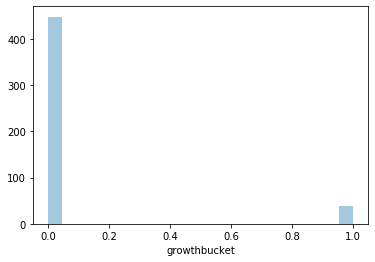

In [13]:
sns.distplot(a=data.growthbucket, kde=False)

In [14]:
per = ((data['growthbucket'][data.growthbucket==0].count())/data.growthbucket.count())*100
print('The percentage of non-recessed data is : {}%'.format(round(per, 2)))

The percentage of non-recessed data is : 92.18%


In [15]:
# Initial target classes count
data.groupby("growthbucket").count()

,pop,emp,emp_to_pop_ratio,hc,ccon,cda,cn,ck,ctfp,cwtfp,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,total,excl_energy,energy,metals_minerals,forestry,agriculture,fish,total_change,excl_energy_change,energy_change,metals_minerals_change,forestry_change,agriculture_change,fish_change
growthbucket,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448
1,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38


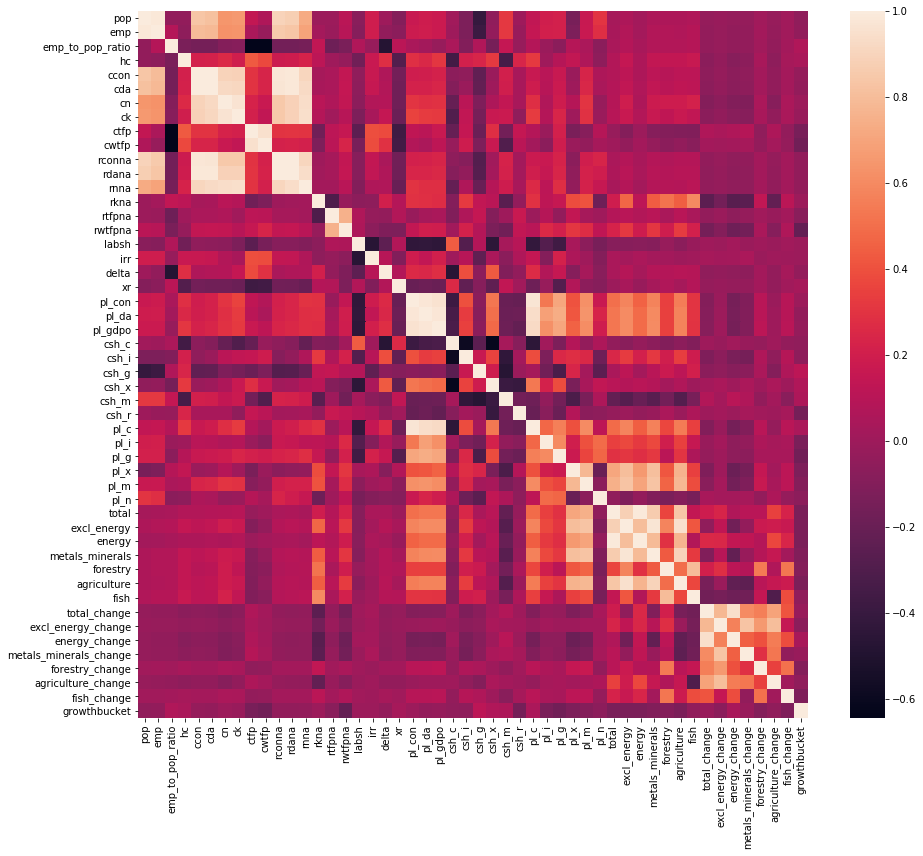

In [16]:
plt.figure(figsize=(15, 13))
sns.heatmap(data=data.corr())

In [17]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [18]:
data.shape

(486, 34)

## Model training
First, we need to develop a method to correctly measure model accuracy. Since our target variable has a class imbalance, we need something a little bit more complex than simple cross-validation. We'll use the following scheme:

- Randomly split data on train and test sets.
- Handle class imbalance in train set with one of three available methods: random undersampling, random oversampling or oversampling with SMOTE algorithm.
- Train and test the model, separately measuring the accuracy of determining a recession and accuracy of determining the absence of a recession.
- Repeat this multiple times and average the results.

#### Main Functions

In [19]:
def test_with_tts(model, data, smpl_strat='rusamp', random_state=0):
    
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop('growthbucket', axis=1), 
        data.growthbucket, 
        random_state=random_state
    )
    if smpl_strat == 'rusamp':
        rus = RandomUnderSampler(random_state=0)
        X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    elif smpl_strat == 'rosamp':
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    elif smpl_strat == 'smote':
        smote = SMOTE(random_state=0)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    elif smpl_strat == 'roruSamp':
        ros = RandomOverSampler(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
        X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)
    elif smpl_strat == 'ruroSamp':
        ros = RandomOverSampler(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
        X_resampled, y_resampled = ros.fit_resample(X_resampled, y_resampled)
    elif smpl_strat == 'smruSamp':
        smote = SMOTE(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)
    elif smpl_strat == 'rusmSamp':
        smote = SMOTE(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
        X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)
    X_resampled = pd.DataFrame(X_resampled, columns=X_test.columns) 
    
    model.fit(X_resampled, y_resampled)
    preds = model.predict(X_test)
    y_test.name = 'expected'
    results = pd.concat(
        [y_test, pd.Series(preds, index=y_test.index, name='got')], 
        axis=1
    )

    recessed = results[results.expected == 1]
    non_recessed = results[results.expected == 0]
    acc_rec = accuracy_score(recessed.expected, recessed.got)
    acc_nrec = accuracy_score(non_recessed.expected, non_recessed.got)
    
    return (acc_rec, acc_nrec)



def test_with_mc(n_it, model, data, smpl_strat='rusamp'):
    random.seed(0)
    
    results_rec = []
    results_nrec = []
    for i in range(n_it):
        r_r, r_n = test_with_tts(
            model, 
            data, 
            smpl_strat, 
            i*random.randint(0,1e2) # randomises train_test_split
        )
        results_rec.append(r_r)
        results_nrec.append(r_n)
    acc_rec = sum(results_rec)/len(results_rec)
    acc_nrec = sum(results_nrec)/len(results_nrec)
    return (acc_rec, acc_nrec)

In [20]:
def print_acc_res(a_r):
    print('Recessed classification accuracy: {}%'.format(round(a_r[0], 2)))
    print('None-recessed classification accuracy: {}%'.format(round(a_r[1], 2)))

Next, let's test some models find which is best-performed. We'll check out XGBoost, RandomForest and Ridge.

Random undersampling is a simple and easy-to-understand strategy. However, in this particular case, it left us with less than 80 rows in the dataset, which leads to low none-recessed-classification accuracy. Even if recessed-classification accuracy is good (and it usually is) this does not fit our success criteria.

#### XGBClassifier

In [21]:
xgb_us_full = test_with_mc(
    20, 
    XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=0, eval_metric='logloss'), 
    data, 
    smpl_strat='rusamp'
)

print_acc_res(xgb_us_full)

Recessed classification accuracy: 0.66%
None-recessed classification accuracy: 0.64%


Oversampling strategies tend to improve none-recessed-classification accuracy and slightly worsen recessed-classification accuracy, which is a better fit for our success criteria. SMOTE is generally a little bit better than random oversampling.

In [22]:
xgb_os_full = test_with_mc(
    20, 
    XGBClassifier(n_estimators=500, learning_rate=0.001, random_state=0, eval_metric='logloss'), 
    data, 
    smpl_strat='rosamp'
)

print_acc_res(xgb_os_full)

Recessed classification accuracy: 0.33%
None-recessed classification accuracy: 0.9%


In [23]:
xgb_smote_full = test_with_mc(
    20, 
    XGBClassifier(n_estimators=500, learning_rate=0.001, random_state=0, eval_metric='logloss'), 
    data, 
    smpl_strat='smote'
)

print_acc_res(xgb_smote_full)

Recessed classification accuracy: 0.31%
None-recessed classification accuracy: 0.89%


XGBoost (especially with SMOTE) looks appropriate for our model.

#### RandomForestClassifier

In [24]:
rf_us_full = test_with_mc(
    20, 
    RandomForestClassifier(random_state=0), 
    data, 
    smpl_strat='rusamp'
)

print_acc_res(rf_us_full)

Recessed classification accuracy: 0.68%
None-recessed classification accuracy: 0.68%


In [25]:
rf_os_full = test_with_mc(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0), 
    data, 
    smpl_strat='rosamp'
)

print_acc_res(rf_os_full)

Recessed classification accuracy: 0.38%
None-recessed classification accuracy: 0.92%


In [26]:
rf_smote_full = test_with_mc(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0), 
    data, 
    smpl_strat='smote'
)

print_acc_res(rf_smote_full)

Recessed classification accuracy: 0.49%
None-recessed classification accuracy: 0.89%


RandomForest (especially with SMOTE) looks appropriate for our model better than XGBoost.

#### RidgeClassifier

In [27]:
rid_us_full = test_with_mc(
    20, 
    RidgeClassifier(alpha=1.0, random_state=0), 
    data, 
    smpl_strat='rusamp'
)

print_acc_res(rid_us_full)

Recessed classification accuracy: 0.66%
None-recessed classification accuracy: 0.63%


In [28]:
rid_os_full = test_with_mc(
    20, 
    RidgeClassifier(alpha=1.0, random_state=0), 
    data, 
    smpl_strat='rosamp'
)

print_acc_res(rid_os_full)

Recessed classification accuracy: 0.56%
None-recessed classification accuracy: 0.76%


In [29]:
rid_smote_full = test_with_mc(
    20, 
    RidgeClassifier(alpha=10.0, random_state=0), 
    data, 
    smpl_strat='smote'
)

print_acc_res(rid_smote_full)

Recessed classification accuracy: 0.58%
None-recessed classification accuracy: 0.76%


#### XGB with undersampling is the best

In [30]:
 #====== STOP ======

## Applying other methods of resampling both up and down together before passing to our model

In [31]:
# Our aim is not to tweeek the model or dataset by any other means to achieve a better accuracies, but by tweeking
# the dataset using other advance up and down resampling techniques together to improve the model(that is, by combining the 
# good effects of but upsampling and downsampling to get a better model; if you like a kind of Ensembling)

#### XGBClassifier

In [32]:
# roruSamp - overSampling & UnderSampling

xgb_roruSamp = test_with_mc(
    20, 
    XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=0, eval_metric='logloss'),
    data, 
    smpl_strat='roruSamp'
)

print_acc_res(xgb_roruSamp)

Recessed classification accuracy: 0.26%
None-recessed classification accuracy: 0.97%


In [33]:
# ruroSamp - UnderSampling & overSampling

xgb_ruroSamp = test_with_mc(
    20, 
    XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=0, eval_metric='logloss'),
    data, 
    smpl_strat='ruroSamp'
)

print_acc_res(xgb_ruroSamp)

Recessed classification accuracy: 0.66%
None-recessed classification accuracy: 0.64%


In [34]:
# smruSamp - smote & UnderSampling

xgb_smruSamp = test_with_mc(
    20, 
    XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=0, eval_metric='logloss'),
    data, 
    smpl_strat='smruSamp'
)

print_acc_res(xgb_smruSamp)

Recessed classification accuracy: 0.3%
None-recessed classification accuracy: 0.96%


In [35]:
# rusmSamp - UnderSampling & smote

xgb_rusmSamp = test_with_mc(
    20, 
    XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=0, eval_metric='logloss'),
    data, 
    smpl_strat='rusmSamp'
)

print_acc_res(xgb_rusmSamp)

Recessed classification accuracy: 0.66%
None-recessed classification accuracy: 0.64%


#### RandomForestClassifier

In [36]:
# roruSamp - overSampling & UnderSampling

rf_roruSamp = test_with_mc(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='roruSamp'
)

print_acc_res(rf_roruSamp)

Recessed classification accuracy: 0.41%
None-recessed classification accuracy: 0.92%


In [37]:
# ruroSamp - UnderSampling & overSampling

rf_ruroSamp = test_with_mc(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='ruroSamp'
)

print_acc_res(rf_ruroSamp)

Recessed classification accuracy: 0.6%
None-recessed classification accuracy: 0.69%


In [38]:
# smruSamp - smote & UnderSampling

rf_smruSamp = test_with_mc(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='smruSamp'
)

print_acc_res(rf_smruSamp)

Recessed classification accuracy: 0.49%
None-recessed classification accuracy: 0.88%


In [39]:
# rusmSamp - UnderSampling & smote

rf_rusmSamp = test_with_mc(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='rusmSamp'
)

print_acc_res(rf_rusmSamp)

Recessed classification accuracy: 0.6%
None-recessed classification accuracy: 0.69%


#### RidgeClassifier

In [40]:
# roruSamp - overSampling & UnderSampling

rid_roruSamp = test_with_mc(
    20, 
    RidgeClassifier(alpha=1.0, random_state=0),
    data, 
    smpl_strat='roruSamp'
)

print_acc_res(rid_roruSamp)

Recessed classification accuracy: 0.56%
None-recessed classification accuracy: 0.76%


In [41]:
# ruroSamp - UnderSampling & overSampling

rid_ruroSamp = test_with_mc(
    20, 
    RidgeClassifier(alpha=1.0, random_state=0),
    data, 
    smpl_strat='ruroSamp'
)

print_acc_res(rid_ruroSamp)

Recessed classification accuracy: 0.66%
None-recessed classification accuracy: 0.63%


In [42]:
# smruSamp - smote & UnderSampling

rid_smruSamp = test_with_mc(
    20, 
    RidgeClassifier(alpha=1.0, random_state=0),
    data, 
    smpl_strat='smruSamp'
)

print_acc_res(rid_smruSamp)

Recessed classification accuracy: 0.54%
None-recessed classification accuracy: 0.78%


In [43]:
# rusmSamp - UnderSampling & smote

rid_rusmSamp = test_with_mc(
    20, 
    RidgeClassifier(alpha=1.0, random_state=0),
    data, 
    smpl_strat='rusmSamp'
)

print_acc_res(rid_rusmSamp)

Recessed classification accuracy: 0.66%
None-recessed classification accuracy: 0.63%


In [44]:
# ---- End

#### Let's try one combination with python pipeline library

In [45]:
from imblearn.pipeline import Pipeline

In [46]:
def test_with_tts2(model, data, smpl_strat='rusamp', random_state=0):
    
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop('growthbucket', axis=1), 
        data.growthbucket, 
        random_state=random_state
    )
    if smpl_strat == 'rusamp':
        rus = RandomUnderSampler(random_state=0)
        X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    elif smpl_strat == 'rosamp':
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    elif smpl_strat == 'smote':
        smote = SMOTE(random_state=0)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    elif smpl_strat == 'roruSamp':
        ros = RandomOverSampler(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        rfc_pipeline = Pipeline(steps = [('o', ros),('u', rus),('model', model)])
        #X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
        #X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)
    elif smpl_strat == 'ruroSamp':
        ros = RandomOverSampler(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        rfc_pipeline = Pipeline(steps = [('u', rus),('o', ros),('model', model)])
        #X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
        #X_resampled, y_resampled = ros.fit_resample(X_resampled, y_resampled)
    elif smpl_strat == 'smruSamp':
        smote = SMOTE(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        rfc_pipeline = Pipeline(steps = [('s', smote),('u', rus),('model', model)])
        #X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        #X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)
    elif smpl_strat == 'rusmSamp':
        smote = SMOTE(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        rfc_pipeline = Pipeline(steps = [('u', rus),('s', smote),('model', model)])
        #X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
        #X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)
    #X_resampled = pd.DataFrame(X_resampled, columns=X_test.columns) 
    
    rfc_pipeline.fit(X_train, y_train)
    preds = rfc_pipeline.predict(X_test)
    #model.fit(X_resampled, y_resampled)
    #preds = model.predict(X_test)
    y_test.name = 'expected'
    results = pd.concat(
        [y_test, pd.Series(preds, index=y_test.index, name='got')], 
        axis=1
    )

    recessed = results[results.expected == 1]
    non_recessed = results[results.expected == 0]
    acc_rec = accuracy_score(recessed.expected, recessed.got)
    acc_nrec = accuracy_score(non_recessed.expected, non_recessed.got)
    
    return (acc_rec, acc_nrec)



def test_with_mc2(n_it, model, data, smpl_strat='rusamp'):
    random.seed(0)
    
    results_rec = []
    results_nrec = []
    for i in range(n_it):
        r_r, r_n = test_with_tts2(
            model, 
            data, 
            smpl_strat, 
            i*random.randint(0,1e2) # randomises train_test_split
        )
        results_rec.append(r_r)
        results_nrec.append(r_n)
    acc_rec = sum(results_rec)/len(results_rec)
    acc_nrec = sum(results_nrec)/len(results_nrec)
    return (acc_rec, acc_nrec)

In [47]:
# Since random forest performed well, lets use this

# roruSamp - overSampling & UnderSampling

rf_roruSamp2 = test_with_mc2(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='roruSamp'
)

print_acc_res(rf_roruSamp2)

Recessed classification accuracy: 0.41%
None-recessed classification accuracy: 0.92%


In [48]:
# ruroSamp - UnderSampling & overSampling

rf_ruroSamp2 = test_with_mc2(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='ruroSamp'
)

print_acc_res(rf_ruroSamp2)

Recessed classification accuracy: 0.6%
None-recessed classification accuracy: 0.69%


In [49]:
# smruSamp - smote & UnderSampling

rf_smruSamp2 = test_with_mc2(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='smruSamp'
)

print_acc_res(rf_smruSamp2)

Recessed classification accuracy: 0.49%
None-recessed classification accuracy: 0.88%


In [50]:
# rusmSamp - UnderSampling & smote

rf_rusmSamp2 = test_with_mc2(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='rusmSamp'
)

print_acc_res(rf_rusmSamp2)

Recessed classification accuracy: 0.6%
None-recessed classification accuracy: 0.69%


#### Let's try to combine the outputs of individual techniques after acting on the original dataset, and not allow the output of one to be the import of the other

In [51]:
#=========Trial starts

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
        data.drop('growthbucket', axis=1), 
        data.growthbucket, 
        random_state=0
    )

In [53]:
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
#rfc_pipeline = Pipeline(steps = [('o', ros),('u', rus),('model', model)])
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)

In [54]:
X_resampled_ros.shape, y_resampled_ros.shape

((664, 33), (664,))

In [55]:
X_resampled_rus.shape, y_resampled_rus.shape

((64, 33), (64,))

In [56]:
#X_resampled = X_resampled_ros + X_resampled_rus

X_resampled = pd.concat([X_resampled_ros, X_resampled_rus])
y_resampled = pd.concat([y_resampled_ros, y_resampled_rus])

X_resampled = pd.DataFrame(X_resampled, columns=X_test.columns)

In [57]:
X_resampled.shape

(728, 33)

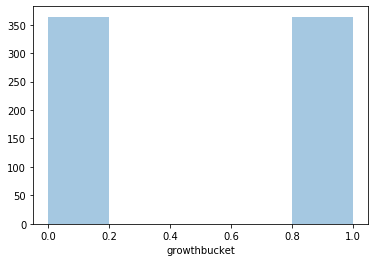

In [58]:
sns.distplot(a=y_resampled, kde=False)

In [59]:
model = RandomForestClassifier(max_depth=3, random_state=0)
model.fit(X_resampled, y_resampled)
preds = model.predict(X_test)
y_test.name = 'expected'
results = pd.concat([y_test, pd.Series(preds, index=y_test.index, name='got')], axis=1)


In [60]:
recessed = results[results.expected == 1]
non_recessed = results[results.expected == 0]
acc_rec = accuracy_score(recessed.expected, recessed.got)
acc_nrec = accuracy_score(non_recessed.expected, non_recessed.got)

In [61]:
acc_rec, acc_nrec

(0.3333333333333333, 0.9482758620689655)

In [62]:
#=========Trial ends

#### Modify our function to do the trial several times and average it

In [63]:
def test_with_tts3(model, data, smpl_strat='rusamp', random_state=0):
    
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop('growthbucket', axis=1), 
        data.growthbucket, 
        random_state=random_state
    )
    if smpl_strat == 'rusamp':
        rus = RandomUnderSampler(random_state=0)
        X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    elif smpl_strat == 'rosamp':
        ros = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    elif smpl_strat == 'smote':
        smote = SMOTE(random_state=0)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    elif smpl_strat == 'roruSamp':
        ros = RandomOverSampler(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        #rfc_pipeline = Pipeline(steps = [('o', ros),('u', rus),('model', model)])
        X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)
        X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)
        X_resampled = pd.concat([X_resampled_ros, X_resampled_rus])
        y_resampled = pd.concat([y_resampled_ros, y_resampled_rus])
    elif smpl_strat == 'ruroSamp':
        ros = RandomOverSampler(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        #rfc_pipeline = Pipeline(steps = [('o', ros),('u', rus),('model', model)])
        X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)
        X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)
        X_resampled = pd.concat([X_resampled_rus, X_resampled_ros])
        y_resampled = pd.concat([y_resampled_rus, y_resampled_ros])
    elif smpl_strat == 'smruSamp':
        smote = SMOTE(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        X_resampled_sm, y_resampled_sm = smote.fit_resample(X_train, y_train)
        X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)
        X_resampled = pd.concat([X_resampled_sm, X_resampled_rus])
        y_resampled = pd.concat([y_resampled_sm, y_resampled_rus])
    elif smpl_strat == 'rusmSamp':
        smote = SMOTE(random_state=0)
        rus = RandomUnderSampler(random_state=0)
        X_resampled_sm, y_resampled_sm = smote.fit_resample(X_train, y_train)
        X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)
        X_resampled = pd.concat([X_resampled_rus, X_resampled_sm])
        y_resampled = pd.concat([y_resampled_rus, y_resampled_sm])
    X_resampled = pd.DataFrame(X_resampled, columns=X_test.columns) 
    
    
    model.fit(X_resampled, y_resampled)
    preds = model.predict(X_test)
    y_test.name = 'expected'
    results = pd.concat(
        [y_test, pd.Series(preds, index=y_test.index, name='got')], 
        axis=1
    )

    recessed = results[results.expected == 1]
    non_recessed = results[results.expected == 0]
    acc_rec = accuracy_score(recessed.expected, recessed.got)
    acc_nrec = accuracy_score(non_recessed.expected, non_recessed.got)
    
    return (acc_rec, acc_nrec)



def test_with_mc3(n_it, model, data, smpl_strat='rusamp'):
    random.seed(0)
    
    results_rec = []
    results_nrec = []
    for i in range(n_it):
        r_r, r_n = test_with_tts3(
            model, 
            data, 
            smpl_strat, 
            i*random.randint(0,1e2) # randomises train_test_split
        )
        results_rec.append(r_r)
        results_nrec.append(r_n)
    acc_rec = sum(results_rec)/len(results_rec)
    acc_nrec = sum(results_nrec)/len(results_nrec)
    return (acc_rec, acc_nrec)

In [64]:
# Since random forest performed well, lets use this

# roruSamp - overSampling & UnderSampling

rf_roruSamp3 = test_with_mc3(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='roruSamp'
)

print_acc_res(rf_roruSamp3)

Recessed classification accuracy: 0.37%
None-recessed classification accuracy: 0.92%


In [65]:
# ruroSamp - UnderSampling & overSampling

rf_ruroSamp3 = test_with_mc3(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='ruroSamp'
)

print_acc_res(rf_ruroSamp3)

Recessed classification accuracy: 0.39%
None-recessed classification accuracy: 0.92%


In [66]:
# smruSamp - smote & UnderSampling

rf_smruSamp3 = test_with_mc3(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='smruSamp'
)

print_acc_res(rf_smruSamp3)

Recessed classification accuracy: 0.51%
None-recessed classification accuracy: 0.88%


In [67]:
# rusmSamp - UnderSampling & smote

rf_rusmSamp3 = test_with_mc3(
    20, 
    RandomForestClassifier(max_depth=3, random_state=0),
    data, 
    smpl_strat='rusmSamp'
)

print_acc_res(rf_rusmSamp3)

Recessed classification accuracy: 0.47%
None-recessed classification accuracy: 0.88%
